In [1]:
import utils
import cv2
import model as m
import torch

In [25]:
maps_dataset_train = utils.ImageSet('maps',transform=utils.data_transforms['training'])
maps_dataloader_train = utils.DataLoader(maps_dataset_train,batch_size=10,shuffle=True)

In [26]:
model = m.Pix2Pix()
## In the paper the default number of epoch is 200
utils.train(model,10,maps_dataloader_train)

Epoch 1/10
----------
 576/1096: [==============>.................] - ETA 34.3s

KeyboardInterrupt: 

In [4]:
import utils

In [5]:
maps_dataset_val = utils.ImageSet('maps',transform=utils.data_transforms['validation'],val_mode=True)
maps_dataloader_val = utils.DataLoader(maps_dataset_val,batch_size=2)

In [15]:
img, real = next(iter(maps_dataloader_val))



In [16]:
img.shape

torch.Size([2, 3, 256, 256])

In [17]:
img[0]

tensor([[[-0.5259,  0.1092,  0.0029,  ..., -0.7284, -0.7432, -0.5715],
         [-0.4210,  0.0509,  0.1712,  ..., -0.7469, -0.7482, -0.7684],
         [-0.1911,  0.0591,  0.0639,  ..., -0.7454, -0.7265, -0.7823],
         ...,
         [-0.6290, -0.7929, -0.6176,  ..., -0.0201,  0.1151, -0.2489],
         [-0.5826, -0.6636, -0.5543,  ..., -0.2514, -0.8556, -0.8885],
         [-0.5089, -0.4523, -0.5571,  ..., -0.2252, -0.8376, -0.7608]],

        [[-0.5338,  0.1170,  0.0237,  ..., -0.7469, -0.7513, -0.5629],
         [-0.4288,  0.0587,  0.1919,  ..., -0.7756, -0.7795, -0.7790],
         [-0.1989,  0.0670,  0.0847,  ..., -0.7957, -0.7657, -0.8138],
         ...,
         [-0.5898, -0.7537, -0.5784,  ...,  0.0118,  0.1000, -0.2645],
         [-0.5434, -0.6244, -0.5150,  ..., -0.2194, -0.8707, -0.9041],
         [-0.4697, -0.4131, -0.5179,  ..., -0.1932, -0.8526, -0.7765]],

        [[-0.5652,  0.1013,  0.0136,  ..., -0.7632, -0.7617, -0.5629],
         [-0.4602,  0.0430,  0.1819,  ..., -0

In [18]:
out = model.generator(img)

In [19]:
img = (img[0]+1)*0.5
out = out[0]
img.shape

torch.Size([3, 256, 256])

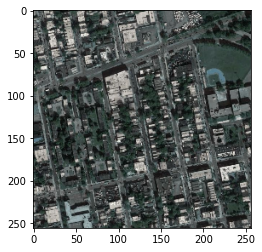

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


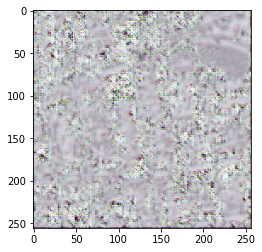

In [21]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0))

In [23]:
out = (out+1)*0.5

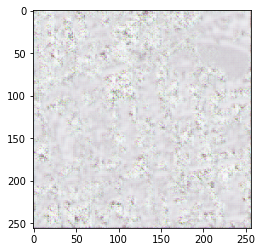

In [24]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0))